<a href="https://colab.research.google.com/github/GustavoBD-Dev/AnalyticalModelsWithPythonCourse/blob/Session-6/16_RegresionLineal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Regresión Lineal**

El conjunto de datos "Housing" del repositorio de aprendizaje automático de la Universidad de California en Irvine (UCI) es uno de los conjuntos de datos más utilizados en la enseñanza de técnicas de regresión y análisis de datos.

El conjunto de datos contiene 506 registros y 14 atributos, que incluyen información como la tasa de impuesto a la propiedad, la proporción de habitaciones por vivienda ocupada, la tasa de criminalidad per cápita, entre otros.

1. **CRIM:** tasa de delincuencia per cápita por ciudad

2. **ZN:** proporción de terrenos residenciales zonificados para lotes de más de 25.000 pies cuadrados

3. **INDUS:** proporción de acres de negocios no minoristas por ciudad

4. **CHAS:** variable ficticia del río Charles (= 1 si la parcela limita con el río; 0 en caso contrario)

5. **NOX:** concentración de óxidos nítricos (partes por cada 10 millones)

6. **RM:** número promedio de habitaciones por vivienda

7. **AGE:** proporción de unidades ocupadas por sus propietarios construidas antes de 1940

8. **DIS:** distancias ponderadas a cinco centros de empleo de Boston

9. **RAD:** índice de accesibilidad a carreteras radiales

10. **TAX:** tasa de impuesto sobre la propiedad de valor total por cada $10,000

11. **PTRATIO:** relación alumno-maestro por ciudad

12. **B:** 1000(Bk - 0.63)^2 donde Bk es la proporción de negros por ciudad

13. **LSTAT:** % de estatus social bajo de la población

14. **MEDV:** valor mediano de las viviendas ocupadas por sus propietarios en miles de dólares ($1000)

In [ ]:
import pandas as pd

df = pd.read_csv(
    'https://archive.ics.uci.edu/ml/machine-learning-databases/housing/housing.data',
    header=None, # especificamos que el dataset no tiene headers.
    sep='\s+') # especificamos que la separacion esta hecha por espacios y no por comas.

df.columns = ["CRIM","ZN","INDUS" , "CHAS" ,"NOX","RM" ,"AGE","DIS", "RAD","TAX", "PTRATIO", "B" , "LSTAT" , "MEDV"]

df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


####**Variables de interés**
- **DIS:** distancias ponderadas a cinco centros de empleo de Boston
- **INDUS:** proporción de acres de negocios no minoristas por ciudad
- **CRIM:** tasa de delincuencia per cápita por ciudad
- **RM:** número promedio de habitaciones por vivienda
- **MEDV:** valor mediano de las viviendas ocupadas por sus propietarios en miles - **de dólares ($1000)

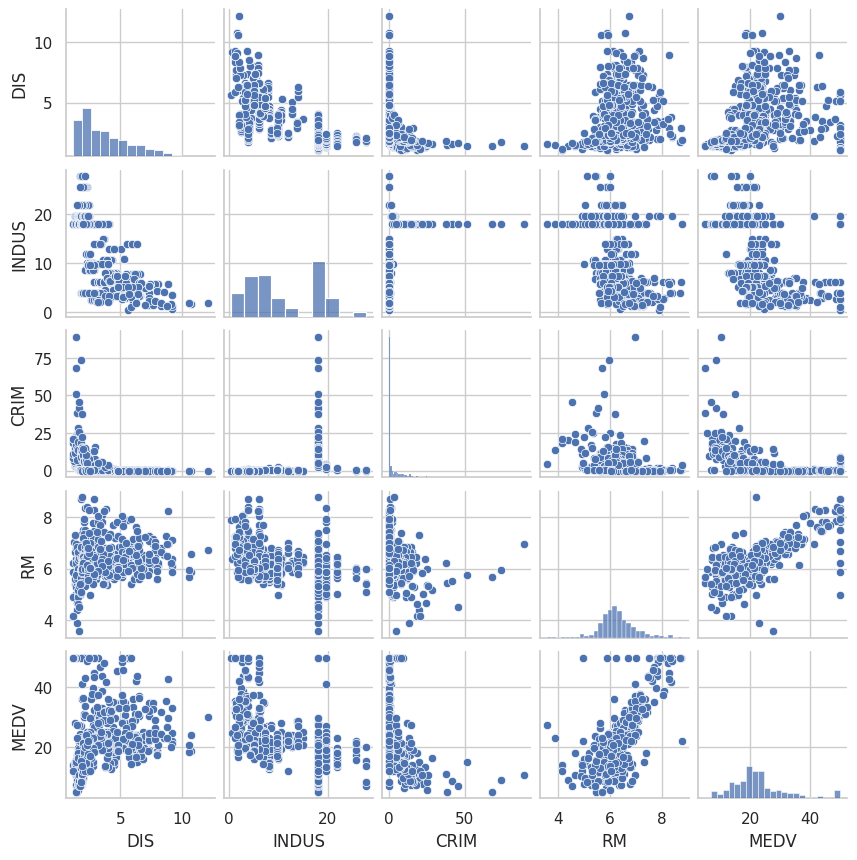

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Configuramos la apariencia de los graficos
sns.set(style='whitegrid', context='notebook')

# Seleccionamos los features que mas nos interesa para ver la correlacion entre las variables
cols = ["DIS", "INDUS", "CRIM", "RM","MEDV"]

# Graficamos con un pairplot las variables de interes para ver sus relaciones
sns.pairplot(df[cols], height=1.75);

<Axes: >

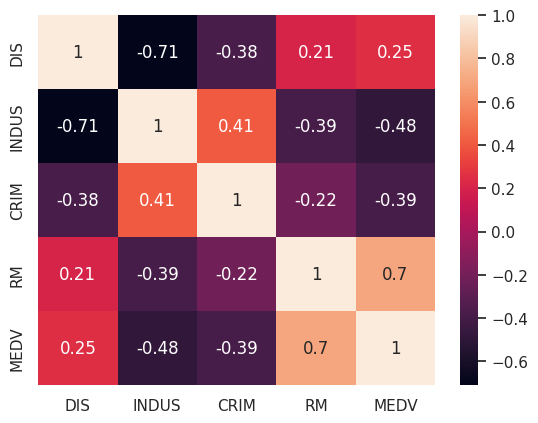

In [ ]:
sns.heatmap(
    data=df[cols].corr(),
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

In [ ]:
# Guardamos los datos de interes en una variable x, y respectivamente
x = df['RM'].values.reshape(-1,1) # variable independiente
y = df['MEDV'].values.reshape(-1,1) # variable dependiente

In [ ]:
from sklearn.preprocessing import StandardScaler

# instanciamos el modelo de escalamiento
sc_x = StandardScaler()
sc_y = StandardScaler()

In [ ]:
# estandarizamos los datos z=(x-u)/std
x_standard = sc_x.fit_transform(x)
y_standard = sc_y.fit_transform(y)

In [ ]:
from sklearn.linear_model import LinearRegression

# Instanciamos y ajustamos el modelo de regresión lineal
slr = LinearRegression() # Standar Linear Regression (slr)
slr.fit(x_standard,y_standard)

LinearRegression()

Text(0, 0.5, 'Mediana del precio de las casas x1000 (MEDV)')

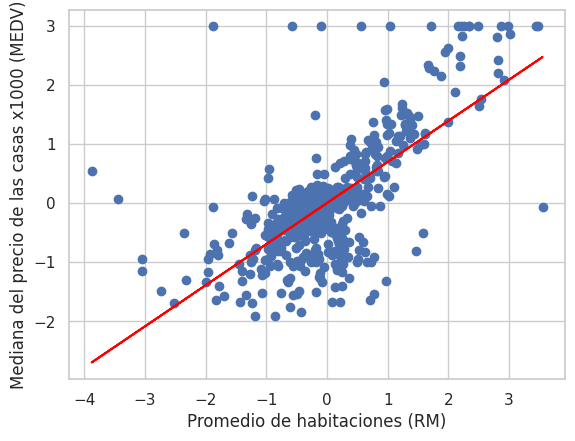

In [ ]:
# Graficamos los datos estandarizados
plt.scatter(x_standard, y_standard)
# Graficamos la linea de regresion ajustada
plt.plot(x_standard, slr.predict(x_standard), color='red')

plt.xlabel("Promedio de habitaciones (RM)")
plt.ylabel("Mediana del precio de las casas x1000 (MEDV)")

In [ ]:
import numpy as np

# Representamos el numero de habitaciones de la casa que queremos predecir
num_habitaciones = 6

# Estandarizamos sc_x para predecir el predio de la casa
num_habitaciones_standard = sc_x.transform(np.array([num_habitaciones]).reshape(-1,1))

# Usamos la transformada inversa en el resultado para volver a la escala original
result = sc_y.inverse_transform(slr.predict(num_habitaciones_standard))
print("El precio de una casa con 6 habitaciones en Boston es de", result*1000)

El precio de una casa con 6 habitaciones en Boston es de [[19942.03311064]]


#**Regresión lineal multivariable**

En particular, buscaremos las variables que tengan la mayor correlación con nuestra variable de respuesta, "MEDV". A partir de esto, podremos seleccionar un conjunto de variables predictoras que nos permitan construir un modelo de regresión lineal múltiple que tenga una alta capacidad predictiva y que pueda ser utilizado para estimar los valores de "MEDV" en otras zonas de Boston.

<Axes: >

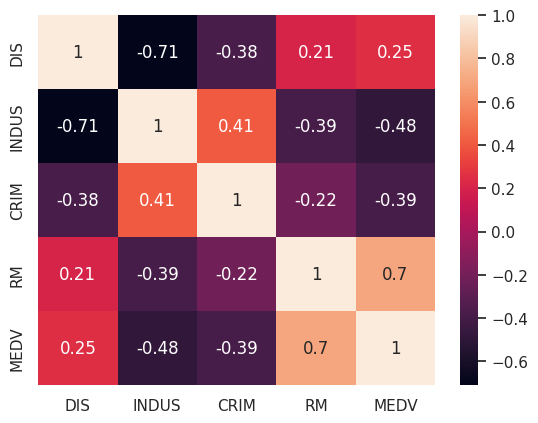

In [ ]:
sns.heatmap(
    data=df[cols].corr(),
    cbar=True, annot=True, yticklabels=cols, xticklabels=cols)

En nuestro análisis de correlación previo mencionamos que las variables que tienen la correlación más fuerte con nuestra variable de respuesta "MEDV" son la cantidad promedio de habitaciones por vivienda (RM) y la proporción de acres de negocios no minoristas por ciudad (INDUS).

In [ ]:
# StandardScaler acepta arreglos de 2 dimensiones por lo cual ya no usamos el reshape(-1,1) con la variable independiente (X)
X = df[['RM', 'INDUS']].values
y = df['MEDV'].values.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()

X_standard = sc_x.fit_transform(X)
y_standard = sc_y.fit_transform(y)

In [ ]:
from sklearn.linear_model import LinearRegression

slr = LinearRegression()
slr.fit(X_standard,y_standard)

LinearRegression()

In [ ]:
import numpy as np

# definir el rango de valores para la variable predictiva "RM"
x1_range = np.arange(
    df['RM'].min(),
    df['RM'].max())

# definir el rango de valores para la variable predictiva "INDUS"
x2_range = np.arange(
    df['INDUS'].min(),
    df['INDUS'].max())

# crear una malla de puntos que cubra los rangos de valores de ambas variables predictoras
X1, X2 = np.meshgrid(x1_range, x2_range)

In [ ]:
# crear un dataframe con todas las combinaciones posibles de valores de ambas variables predictoras
plano = pd.DataFrame(
    {
    'RM':X1.ravel(),
    'INDUS':X2.ravel()
    })
plano.T

,0,1,2,3,4,5,6,7,8,9,...,158,159,160,161,162,163,164,165,166,167
RM,3.561,4.561,5.561,6.561,7.561,8.561,3.561,4.561,5.561,6.561,...,5.561,6.561,7.561,8.561,3.561,4.561,5.561,6.561,7.561,8.561
INDUS,0.460,0.460,0.460,0.460,0.460,0.460,1.460,1.460,1.460,1.460,...,26.460,26.460,26.460,26.460,27.460,27.460,27.460,27.460,27.460,27.460


In [ ]:
# utilizar los coeficientes y la intercepción del modelo de regresión lineal múltiple ajustado para hacer predicciones en el plano creado
pred = slr.predict(plano).reshape(X1.shape)

# escalar las predicciones inversamente utilizando el objeto sc_y para obtener los valores reales de la variable de respuesta "MEDV"
pred = sc_y.inverse_transform(pred)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:458: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [ ]:
import plotly.express as px
import plotly.graph_objects as go

# PLOTTING
mesh_size = .02
margin = 0

fig = px.scatter_3d(df, x='RM', y='INDUS', z='MEDV')
fig.update_traces(marker=dict(size=5))
fig.add_traces(go.Surface(x=X1, y=X2, z=pred, name='pred_surface'))
fig.show()